In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Օժանդակ խնդիր` func

https://blogger.googleusercontent.com/img/a/AVvXsEiPFFKo3Tw7uHpeC4kcYYRNaq9dSmtQFrt8V9th0yctZXDJUtPP1Fl9G_I6IG40xvquPb0EvzBBV_AejyYieaUzF-zJeE66boW1WBfkt1dWD33ejJ4V3C-FJt2SiNIw3TD_FmEwDuhZYqYvseKVc44wxvbvDprJmsmEEpVpCnSeRzZ8PmzZDPQ2Gm1G1NmD

https://blogger.googleusercontent.com/img/a/AVvXsEivQzj9V8msNYcq04qDdTgBDqcnVBm7gAi7yPcrtmvYBLwPuiH97YofdBMVVUu8dHVxhfEGrYxX3G88oPN3Tu0tlU0OxV0c1OJlyOie6kwdmE8GxvMbjIZHQwaEnMJJEXVQLGJIxXZrhWWTMrh1Gi-MvFF1W84j-7BqSz3aUtKzX555FFt7LwUBn82UBDbc

In [18]:
def func(M_bool, M, a, b):   # M-(m, n) matrix, a-array with length m, b-array with length n
    sns.heatmap(M, annot=True, annot_kws={"size": 30}, mask=M_bool==0, cmap='Blues', cbar=False )
    plt.show()
    m, n = M.shape
    n_toxer, n_syuner = [0]*m, [0]*n  # նշված տողեր, նշված սյուներ
    d_toxer, d_syuner = [0]*m, [0]*n  # դիտարկված տողեր, դիտարկված սյուներ
    
    # նշենք այն M[i] տողերը, որոնց համար M[i].sum() < a[i]
    for i in range(m):
        if M[i].sum() < a[i]:
            n_toxer[i] = (-1, a[i]-M[i].sum())
    print('n_toxer: ', n_toxer)
    
    s = True
    while s:        
        # նշված, չդիտարկված տողերի դիտարկում
        for i in range(m):
            if n_toxer[i] != 0 and d_toxer[i] == 0:
                for j in range(n):
                    if M_bool[i][j] and n_syuner[j] == 0:
                        n_syuner[j] = (i, n_toxer[i][1])
                        if M[:, j].sum() < b[j]:  # Բ Փուլ
                            arr = [j]
                            syun = j
                            while arr[-1] != -1:
                                tox = n_syuner[syun][0]
                                arr.append(tox)
                                syun = n_toxer[tox][0]
                                arr.append(syun)
                            arr = arr[:-1]
                            print('j(0), i(1), j(1), ..., j(h-1), i(h) ->', arr)
                            add = min([n_syuner[j][1], b[j]-M[:, j].sum()])
                            for k in range(0, len(arr), 2):
                                M[arr[k+1], arr[k]] += add
                            for k in range(1, len(arr)-2, 2):
                                M[arr[k], arr[k+1]] -= add
                                
                            return func(M_bool, M, a, b)
                d_toxer[i] = 1 
                            
        print('d_toxer: ', d_toxer)
        print('n_syuner: ', n_syuner)
        
        # նշված, չդիտարկված սյուների դիտարկում
        for j in range(n):
            if n_syuner[j] != 0 and d_syuner[j] == 0:
                for i in range(m):
                    if M[i][j] > 0 and n_toxer[i] == 0:
                        n_toxer[i] = (j, min(M[i][j], n_syuner[j][1]))
                d_syuner[j] = 1 
                
        print("d_syuner: ", d_syuner)
        print('n_toxer: ', n_toxer)
        
        s = False
        for i in range(m):
            if (n_toxer[i] != 0 and d_toxer[i] == 0):
                s = True
            
    return M

## Նեղ տեղերի խնդիր

https://blogger.googleusercontent.com/img/a/AVvXsEhrQ9HfLSoV2NUW3UBsUaNcz6MBxA6IIzfdInPgL5nZuSbadcsCmzc3HcSPsgwnQUiQDEIqhWKwh5ZyHV7vgk9A7_NvML8HoQy0AG9J1tGcrdS310kIqC1-PimXZFiqv0wbPEQMB6z0H7Ob_QJd1CaxLGwuvsz1KJa4bKUMsPTGNWmdF2s1j2toXx7r14CN

https://blogger.googleusercontent.com/img/a/AVvXsEhWhT49mDHxQPOnXya4Ao-ugS7Jm7OLIhNsr0DfsX1FR_c2qFOfbHGsxnqgqWzRjVx21LlQtJX5H5g0rxvP_SLFKDbkzym45Bl9bBqXGydnMs6OhbM-e3tQs8sN_Sp1ptHhgXJmzZRyZHOAfQ2JFTl2BCKxkk2T90QBvD1Z3a2wcxTKFRmisGN4b7ZMmU1e

In [19]:
M = np.array([[7, 6, 3, 3, 2, 2],
              [8, 4, 4, 2, 3, 3],
              [8, 4, 2, 3, 3, 3],
              [2, 3, 9, 8, 4, 2],
              [3, 1, 6, 4, 9, 8],
              [2, 2, 8, 4, 8, 3]])

opt = min(M.max(axis=0).min(), M.max(axis=1).min())
B = M.flatten()
B = -np.sort(-np.array([i for i in set(B) if i <= opt]))

opt, B

(6, array([6, 4, 3, 2, 1]))


k =  0  B[k] =  6


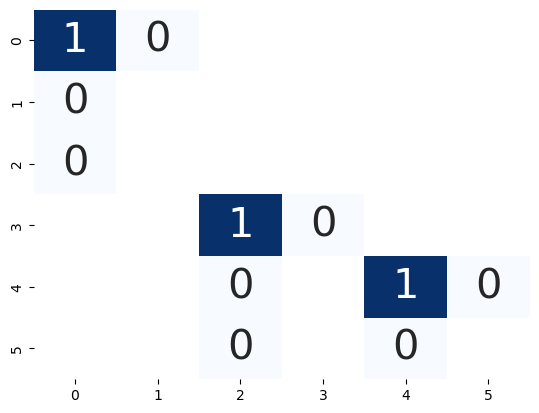

n_toxer:  [0, (-1, 1.0), (-1, 1.0), 0, 0, (-1, 1.0)]
d_toxer:  [0, 1, 1, 0, 0, 1]
n_syuner:  [(1, 1.0), 0, (5, 1.0), 0, (5, 1.0), 0]
d_syuner:  [1, 0, 1, 0, 1, 0]
n_toxer:  [(0, 1), (-1, 1.0), (-1, 1.0), (2, 1), (4, 1), (-1, 1.0)]
j(0), i(1), j(1), ..., j(h-1), i(h) -> [1, 0, 0, 1]


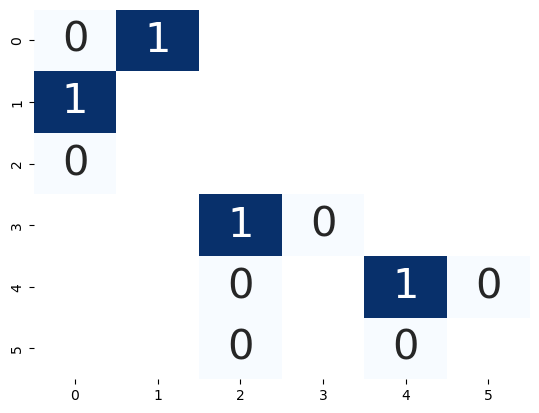

n_toxer:  [0, 0, (-1, 1.0), 0, 0, (-1, 1.0)]
d_toxer:  [0, 0, 1, 0, 0, 1]
n_syuner:  [(2, 1.0), 0, (5, 1.0), 0, (5, 1.0), 0]
d_syuner:  [1, 0, 1, 0, 1, 0]
n_toxer:  [0, (0, 1), (-1, 1.0), (2, 1), (4, 1), (-1, 1.0)]
j(0), i(1), j(1), ..., j(h-1), i(h) -> [3, 3, 2, 5]


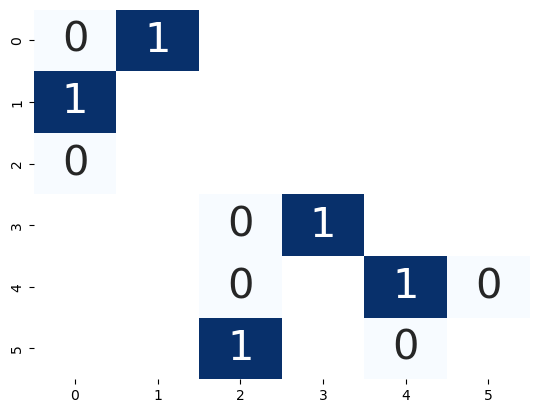

n_toxer:  [0, 0, (-1, 1.0), 0, 0, 0]
d_toxer:  [0, 0, 1, 0, 0, 0]
n_syuner:  [(2, 1.0), 0, 0, 0, 0, 0]
d_syuner:  [1, 0, 0, 0, 0, 0]
n_toxer:  [0, (0, 1), (-1, 1.0), 0, 0, 0]
d_toxer:  [0, 1, 1, 0, 0, 0]
n_syuner:  [(2, 1.0), 0, 0, 0, 0, 0]
d_syuner:  [1, 0, 0, 0, 0, 0]
n_toxer:  [0, (0, 1), (-1, 1.0), 0, 0, 0]

k =  1  B[k] =  4


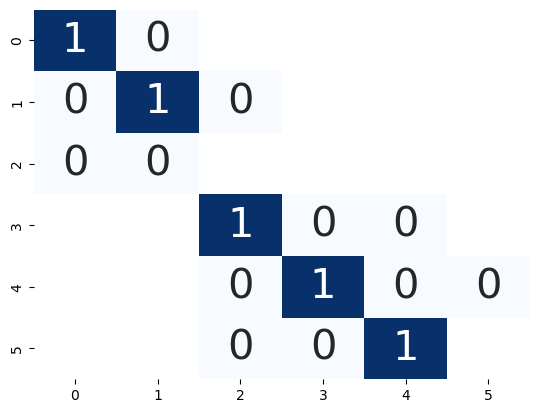

n_toxer:  [0, 0, (-1, 1.0), 0, 0, 0]
d_toxer:  [0, 0, 1, 0, 0, 0]
n_syuner:  [(2, 1.0), (2, 1.0), 0, 0, 0, 0]
d_syuner:  [1, 1, 0, 0, 0, 0]
n_toxer:  [(0, 1), (1, 1), (-1, 1.0), 0, 0, 0]
d_toxer:  [1, 1, 1, 0, 0, 0]
n_syuner:  [(2, 1.0), (2, 1.0), (1, 1), 0, 0, 0]
d_syuner:  [1, 1, 1, 0, 0, 0]
n_toxer:  [(0, 1), (1, 1), (-1, 1.0), (2, 1), 0, 0]
d_toxer:  [1, 1, 1, 1, 0, 0]
n_syuner:  [(2, 1.0), (2, 1.0), (1, 1), (3, 1), (3, 1), 0]
d_syuner:  [1, 1, 1, 1, 1, 0]
n_toxer:  [(0, 1), (1, 1), (-1, 1.0), (2, 1), (3, 1), (4, 1)]
j(0), i(1), j(1), ..., j(h-1), i(h) -> [5, 4, 3, 3, 2, 1, 1, 2]


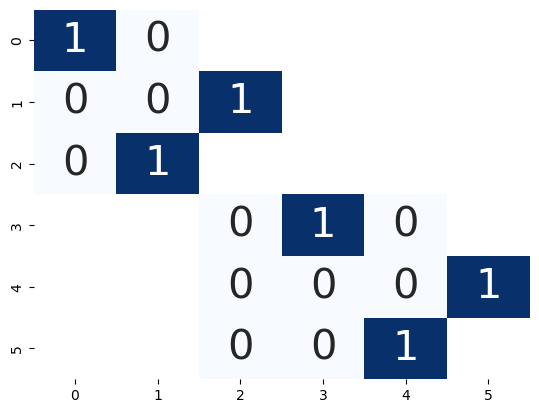

n_toxer:  [0, 0, 0, 0, 0, 0]
d_toxer:  [0, 0, 0, 0, 0, 0]
n_syuner:  [0, 0, 0, 0, 0, 0]
d_syuner:  [0, 0, 0, 0, 0, 0]
n_toxer:  [0, 0, 0, 0, 0, 0]


In [20]:
k = 0
n = M.shape[0]
while True: 
    I = np.zeros(n)
    J = np.zeros(n)
    M_bool = (M >= B[k])
    M_new = np.zeros_like(M)
    for i in range(n):
        for j in range(n):
            if M_bool[i][j] and I[i] == 0 and J[j] == 0:
                M_new[i][j] = 1
                I[i] = 1
                J[j] = 1
                
    print('\nk = ', k, ' B[k] = ', B[k])
    M_result = func(M_bool, M_new, np.ones(n), np.ones(n))
    if M_result.sum() == n:
        opt = B[k]
        break    
    k += 1

<div>
    <img src='https://blogger.googleusercontent.com/img/a/AVvXsEiPFFKo3Tw7uHpeC4kcYYRNaq9dSmtQFrt8V9th0yctZXDJUtPP1Fl9G_I6IG40xvquPb0EvzBBV_AejyYieaUzF-zJeE66boW1WBfkt1dWD33ejJ4V3C-FJt2SiNIw3TD_FmEwDuhZYqYvseKVc44wxvbvDprJmsmEEpVpCnSeRzZ8PmzZDPQ2Gm1G1NmD', width=450>
<div>

<div>
    <img src='https://blogger.googleusercontent.com/img/a/AVvXsEivQzj9V8msNYcq04qDdTgBDqcnVBm7gAi7yPcrtmvYBLwPuiH97YofdBMVVUu8dHVxhfEGrYxX3G88oPN3Tu0tlU0OxV0c1OJlyOie6kwdmE8GxvMbjIZHQwaEnMJJEXVQLGJIxXZrhWWTMrh1Gi-MvFF1W84j-7BqSz3aUtKzX555FFt7LwUBn82UBDbc', width=450>
<div>

<div>
    <img src='https://blogger.googleusercontent.com/img/a/AVvXsEhrQ9HfLSoV2NUW3UBsUaNcz6MBxA6IIzfdInPgL5nZuSbadcsCmzc3HcSPsgwnQUiQDEIqhWKwh5ZyHV7vgk9A7_NvML8HoQy0AG9J1tGcrdS310kIqC1-PimXZFiqv0wbPEQMB6z0H7Ob_QJd1CaxLGwuvsz1KJa4bKUMsPTGNWmdF2s1j2toXx7r14CN', width=450>
<div>

<div>
    <img src='https://blogger.googleusercontent.com/img/a/AVvXsEhWhT49mDHxQPOnXya4Ao-ugS7Jm7OLIhNsr0DfsX1FR_c2qFOfbHGsxnqgqWzRjVx21LlQtJX5H5g0rxvP_SLFKDbkzym45Bl9bBqXGydnMs6OhbM-e3tQs8sN_Sp1ptHhgXJmzZRyZHOAfQ2JFTl2BCKxkk2T90QBvD1Z3a2wcxTKFRmisGN4b7ZMmU1e', width=450>
<div>